<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe61622](https://jckantor.github.io/cbe61622);
content is available [on Github](https://github.com/jckantor/cbe61622.git).*


<!--NAVIGATION-->
< [10.0 Projects](https://jckantor.github.io/cbe61622/10.00-Projects.html) | [Contents](toc.html) | [A.0 Python Source Library](https://jckantor.github.io/cbe61622/A.00-Appendices.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe61622/blob/master/docs/10.10-Computer-Vision.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe61622/10.10-Computer-Vision.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 10.10 Computer Vision Case Study: Finding Particles in Images

The goal of this notebook is to develop a python class for the purpose of counting and labeling flourescent particles captured in images from a prototype for a low-cost medical diagnostic device. 

In this notebook we'll consider traditional image processing techniques .. i.e., those that directly operate on an image to extract scientific information without resort to machine learning techniques. We'll save that imoportant discussion for another time.

## 10.10.1  Books and References

**Computer Vision Textbooks**

Nixon, Mark, and Alberto Aguado. Feature extraction and image processing for computer vision. Academic press, 2019. [link](https://www.elsevier.com/books/feature-extraction-and-image-processing-for-computer-vision/nixon/978-0-12-814976-8?countrycode=US&format=print&utm_source=google_ads&utm_medium=paid_search&utm_campaign=usashoppinglr&gclid=Cj0KCQiA7oyNBhDiARIsADtGRZYaMYLGnWyLuobOVDBjKabaFfe8nSTA5m2zmH0BYBN_AFdnKwpU_jkaArGkEALw_wcB&gclsrc=aw.ds)

Szeliski, Richard. Computer vision: algorithms and applications. Springer Science & Business Media, 2010. [[Hesburgh Library](https://link-springer-com.proxy.library.nd.edu/book/10.1007%2F978-1-84882-935-0)][[Szeliski Web Page and Materials](https://szeliski.org/Book/)][[Preprint of 2nd Edition](https://www.dropbox.com/s/8bf4feleifhrvl6/SzeliskiBookDraft_20210930.pdf?dl=0)]

**Programming Books**

Howse, Joseph, and Joe Minichino. Learning OpenCV 4 Computer Vision with Python 3: Get to grips with tools, techniques, and algorithms for computer vision and machine learning. Packt Publishing Ltd, 2020.

Villán, Alberto Fernández. Mastering OpenCV 4 with Python: A practical guide covering topics from image processing, augmented reality to deep learning with OpenCV 4 and Python 3.7. Packt Publishing Ltd, 2019.

Pajankar, Ashwin. Raspberry Pi Computer Vision Programming: Design and implement computer vision applications with Raspberry Pi, OpenCV, and Python 3. Packt Publishing Ltd, 2020. [Amazon](https://www.amazon.com/Raspberry-Computer-Vision-Programming-applications/dp/1800207212)

**Papers**

Coelho, L.P. 2013. Mahotas: Open source software for scriptable computer vision. Journal of Open Research Software 1(1):e3, DOI: http://dx.doi.org/10.5334/jors.ac

Van Noorden, Richard. "Publishers launch joint effort to tackle altered images in research papers." Nature (2020). https://doi.org/10.1038/d41586-020-01410-9

**Blogs and Postings**

* [Introduction to Computer Vision Using OpenCV and the Raspberry Pi](https://www.circuitbasics.com/introduction-to-computer-vision-using-opencv-and-raspberry-pi/)



## 10.10.2 Python Packages for Computer Vision

See https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-for-image-processing-in-2021/ for a survey of Python libraries for image processing.

**Standard Python Libaries**

One of the very nice aspects of image processing with Python is the wide adoption of basic NumPy arrays to represent image data. This facilitates the use of methods from multiple packages for a particular project.

* [NumPy]() NumPy provides the basic multi-dimensional array data structure used by other image processing libraries.

* [Matplotlib]() Matplotlib incudes functions to read image files in several common formats, and display images.

* [scipy.ndimage](https://docs.scipy.org/doc/scipy/tutorial/ndimage.html) SciPy provides a useful collection of image processing algorithms. 

* [scikit-image](https://scikit-image.org/) A library designed to interoperate with NumPy and SciPy.ndimage libraries.

**Pure Python Libraries**

* [Pillow](https://pillow.readthedocs.io/en/stable/) A fork of the original Python image library (PIL), Pillow is one of the most important Python libraries for image processing, and the foundation for many other packages. For x86 architectures, [Pillow-SIMD](https://github.com/uploadcare/pillow-simd) is a fork that "follows" Pillow to provide algorithms tuned to the x86 SIMD hardware.

* [Imageio](https://github.com/imageio/imageio) Imageio is a cross-platform, pure Python library to read and write images, video, volumetric data, and scientific formats. This is a good, lightweight choice if the reading and writing files in multiple formats is the primary purpose.

**Full Featured Computer Vision Packages**

* [OpenCV/cv2](https://opencv.org/) OpenCV is a C++ library  launched in 1999 at Intel Research to advance real-time computer vision. In 2011 is was taken over by the non-profit foundation OpenCV.org. OpenCV is widely used with mulitple language bindings, full ecosystem of third party documentation, training courses, and [books](https://opencv.org/books/). The Python bindings are accessed by importing the cv2 Python module.

* [Mahotas](https://mahotas.readthedocs.io/en/latest/) A computer vision library written in Python and CPython. While OpenCV is the fastest package, the lack of type checking can result in hard crashes. Mahotas includes type checking with some loss of speed. A paper describing the package is available http://doi.org/10.5334/jors.ac.

* [SimpleITK]() The Natonal Library of Medicine Insight Segmentation and Registration Toolkit (ITK). [book](https://itk.org/ItkSoftwareGuide.pdf)

**Photo Conversion and Management Tools**

* [ImageMagick](https://imagemagick.org) ImageMagick is a widely-used, full-featured package  to create, edit, compose, and convert images. It is available on all major platforms including the Raspberry Pi OS. [Wand](https://pypi.org/project/Wand/) is a Python binding to the ImageMagick API. See https://www.pythonpool.com/imagemagick-python/ for information using Wand and ImageMagick.

* [XnView MP](https://www.xnview.com/en/xnviewmp/) A commercial digital asset management tool available on Windows, Mac OS, and Linux. There are many alternatives on the market.

**Outdated or deprecated libraries** 

These are included here so you know what not to use for your projects.

* [cImage](https://github.com/bnmnetp/cImage) A simple image processing library for Python. Intended for use in introductory computer science courses. Uses PIL.

* [PIL]() Python image library. Hasn't been updated since 2009, now outdated and insecure. Largely been replaced by Pillow, a friendly fork of PIL.

* [SimpleCV](http://simplecv.org/) An open source Python library based on OpenCV designed for rapid development of cmputer vision applications, with accompanying book from Reilly Media. There's no evidence of continued development, and not compatible with recent versions of Python 3.

### 10.10.2.1 File Formats

For this case study we will be developing techniques to analyze images stored as computer files. Later we may consider applying these techniques to a live video stream, but for now we'll use stored images.

Things to know about image files.

* *Raster* versus *vector* images. Image sensors produce raster images.


* Image files can get large, and are often stored in some sort of compressed form.
    * No compression -- not commonly encountered since lossless compression is so straightfforward.
    * Lossless compression -- techniques to encode the data using fewer characters. The most common method of storing raw image data.
    * Lossy compression -- willing to sacrifice some image detail for significantly reduced storage requirements. This technology enables jpeg, mpeg, and video streaming protcols.


* The suffix of an image file usually (i.e., no guarantee) indicates the image file format. 
    * .svg, .dxf, .eps, .pdf -- Vector "document" files which can contain multiple elements in addition to the vector graphics. SVG (scalable vector graphics) is supported by most browsers
    * .png -- The most frequently used losslessly compressed raster image file format widely supported by web browsers. Unlike .jpg, .png allows a transparency channel.  It has largely replaces GIF (Graphics Interchange Format) which is now used primarily for simple animations. 
    * .tiff/.tif -- Tagged Image File Format was introduced to support cross-platform photo editing. Note that .tif files may encode lossy image formats.
    * .dng, .raw, and other raw formats -- Formats that encode the data directly sampled from the image sensor. Useful for post-processing images, and re-processing images.
    * .jpeg/.jpg -- perhaps the most common standard for image files. This is a lossy format, and can be very lossy in extreme cases.
    
General recommendations for scientific use.

* Use lossless image formats when possible. Store the original as a master file. Use a file naming convention to track derivatives of the original image.
* Use .png for line art, graphics, especially for web use.
* Use high quality .jpg for photographs and realistic images. Be careful with "generational loss". Always use sRGB color space which is, by far, the most common color space used for .jpg files.
* When possible lossless .tif, .dng, and raw formats to capture and archive original image data. 

### 10.10.2.2 Image Metadata

Image files also carry *meta-data* providing additional information about the image. There several different standards for meta data, the most common being *exif* data embedded in the image file, or a companion *.xmp* file hold data in the *Extensible Metadata Platform* format. **exiftool** is a command line tool included with many operating systems.

In [31]:
!/usr/local/bin/exiftool data/25-miniM.tif

ExifTool Version Number         : 11.52
File Name                       : 25-miniM.tif
Directory                       : data
File Size                       : 2.4 MB
File Modification Date/Time     : 2021:11:23 13:25:31-05:00
File Access Date/Time           : 2021:11:29 15:44:32-05:00
File Inode Change Date/Time     : 2021:11:23 13:25:44-05:00
File Permissions                : rw-r--r--
File Type                       : TIFF
File Type Extension             : tif
MIME Type                       : image/tiff
Exif Byte Order                 : Little-endian (Intel, II)
Subfile Type                    : Full-resolution Image
Image Width                     : 2560
Image Height                    : 2048
Bits Per Sample                 : 8 8 8
Compression                     : JPEG
Photometric Interpretation      : RGB
Strip Offsets                   : (Binary data 1924 bytes, use -b option to extract)
Orientation                     : Horizontal (normal)
Samples Per Pixel               : 3
R

What's not present in this example?  (Hint: What colors are being displayed?)

Here's the exif data for a photograph prepared through a typical photographer's workflow: RAW --> Noise Reduction --> Adobe Lightroom --> .jpg for export. Carefully look for the color space data.

In [46]:
!/usr/local/bin/exiftool data/eagles-photo-low-quality.jpg

ExifTool Version Number         : 11.52
File Name                       : eagles-photo-low-quality.jpg
Directory                       : data
File Size                       : 248 kB
File Modification Date/Time     : 2021:11:29 16:25:58-05:00
File Access Date/Time           : 2021:11:29 16:28:21-05:00
File Inode Change Date/Time     : 2021:11:29 16:28:18-05:00
File Permissions                : rw-r--r--
File Type                       : JPEG
File Type Extension             : jpg
MIME Type                       : image/jpeg
Exif Byte Order                 : Little-endian (Intel, II)
Make                            : OLYMPUS CORPORATION
Camera Model Name               : E-M1X
X Resolution                    : 240
Y Resolution                    : 240
Resolution Unit                 : inches
Software                        : Adobe Lightroom 5.0 (Macintosh)
Modify Date                     : 2021:11:29 16:25:58
Copyright                       : © Jeffrey Kantor
Exposure Time                

### 10.10.2.3 Calibrating Monitors

Accurate color reproduction requires color management from source to display. At each Color management is now a standard part of most operating systems 

## 10.10.3 Developing a Process

Our approach ...

* Read image
* Crop
* Separate into channels
* Creat a composite
* Equalize histogram
* Blur/Low Pass Filter
* Segment/Threshold
* Use Morphology Transforms to isolate objects
* Locate Objects - Blobs vs Hough Transforms
* Prepare a Report
* Encapsulate as a Python Class

### 10.10.3.1 Python Imports

We track overall code dependencies by consolidating imports into this cell. Note that we'll be using elements from multiple packages by relying on the underlying NumPy representation of images to hold the current state of the process.

In [1]:
%matplotlib inline

# standard Python libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

# computer vision libraries
import cv2 as cv2
import mahotas as mh

### 10.10.3.2 Reading images

As a first step, read the image, convert to rgb scale, and display. All of these packages have a means of reading raster file images in common formats. There are small (and sometimes frustrating) differences among them. Here we use the Matplotlib ``imread()`` method which reads and returns a numpy array.

The array will typical have 2 or 3 dimensions $(h, w, d)$ where $h$ and $w$ are image height and width, and $d$ is pixel depth.

* If $d$ is one or not present, it is a gray scale image
* If $d$ is 3, then typically it is an RGB image with the channels repesenting R, G, and B colors. Note that OpenCV orders the channels as BGR.
* If $d$ is 4, the image could be RGBA where A refers to an alpha transparency channel, or a CYMK encoded color image.

(2048, 2560, 3)


Text(0.5, 1.0, 'A BGR image incorrectly shown as RGB')

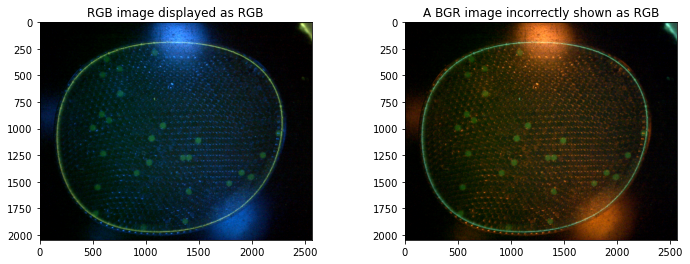

In [5]:
filepath = "data/25-miniM.tif"

# read color image with OpenCV
img_bgr = cv2.imread(filepath)
print(img_bgr.shape)

# convert to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# display images with Matploblib
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].imshow(img_rgb)
ax[0].set_title("RGB image displayed as RGB")

ax[1].imshow(img_bgr)
ax[1].set_title("A BGR image incorrectly shown as RGB")

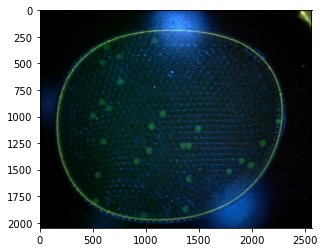

In [6]:
# reading files with Pillow
img = Image.open(filepath)
plt.imshow(img)

Observations:
* The full color image shows diffuse and specular reflections of the blue led used to excite the flourophores.
* The flourescence signal is largelyl confined to the green channel
* There are extraneous elements at the edges of the image

### 10.10.3.3 Cropping

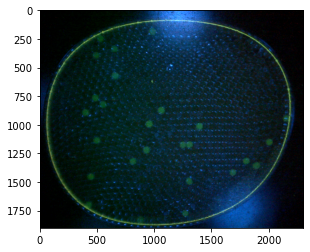

In [199]:
crop_img = img_rgb[100:2000, 100:2400, :].copy()
plt.imshow(crop_img)

### 10.10.3.4 Channels and Histograms

An image is comprised of one or more channels

* Each channel can be treated as a gray scale image
* The values at each pixel may be
    * An 8-bit unsigned integer in the range 0 to 255 (most common)
    * A 12, 14, or 16 bit unsigned integer
    * A real number between 0 and 1
* Color must always be interpreted with respect to [color space](https://en.wikipedia.org/wiki/Color_space).
    


In [200]:
r, g, b = cv2.split(crop_img)

Histograms are a tool for analyzing the distribution of gray levels in a channel. It's a powerful tool for controlling exposure and processing images for presentation.

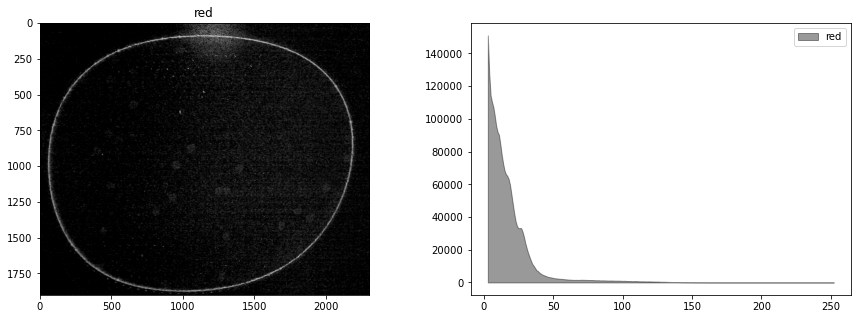

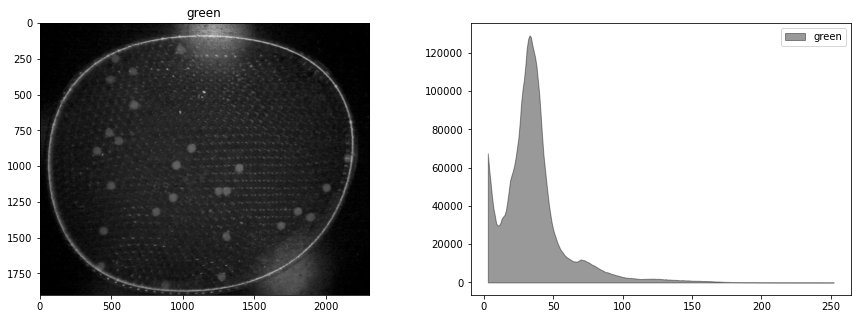

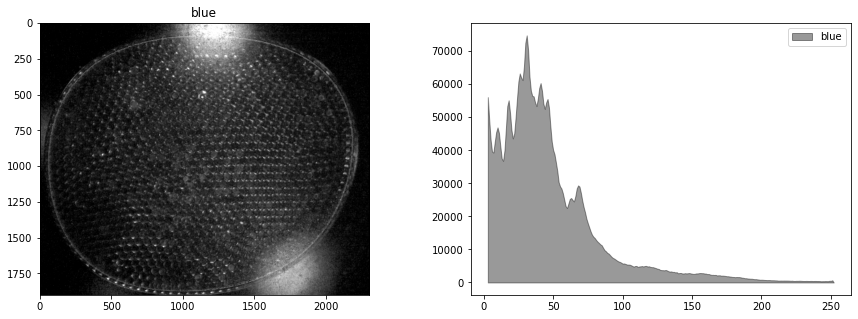

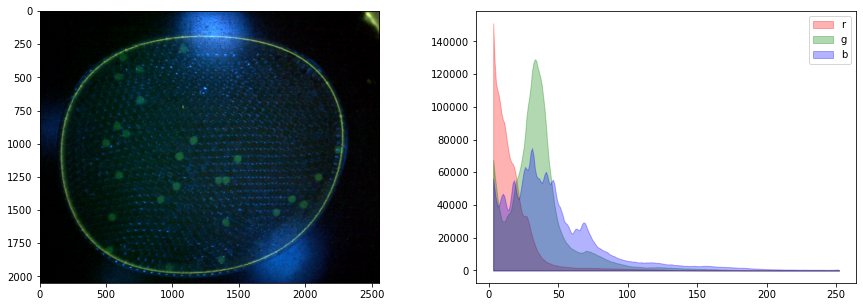

In [201]:
def histogram(channel, bp=3, wp=252):
    """Return histogram and bins for a single channel."""
    hist = cv2.calcHist([channel], [0], None, [wp-bp+1], [bp, wp])
    bins = np.array([b for b in range(bp, wp+1)])
    return hist.flatten(), bins

def display_channel(channel, label=""):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(channel.astype(np.uint8), cmap="gray")
    ax[0].set_title(label)
    hist, bins = histogram(channel.astype(np.uint8))
    ax[1].fill_between(bins, hist, alpha=0.4, color="k", label=label)
    ax[1].legend()

display_channel(r, "red")
display_channel(g, "green")
display_channel(b, "blue")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img)
for color, channel in zip(['r', 'g', 'b'], [r, g, b]):
    hist, bins = histogram(channel)
    ax[1].fill_between(bins, hist, color=color, label=color, alpha=0.3)
ax[1].legend()

### 10.10.3.5 Creating a composite channel

We see the blue leds used to excite the flourophores bleed over into the green channel. It would be best if this could be corrected in the experiment, perhaps by positioning a bandpass filter in front of the leds. What we will attempt here is subtract a multiple of blue channel from the green channel, followed by exposure adjustments. The goal is to provide a cleaner image for doing particle labeling and counting. 

By trial and error, we find a weighted difference of the green and blue channels, and a rescaling of the tone curve that retains the particles and reduces background interference.

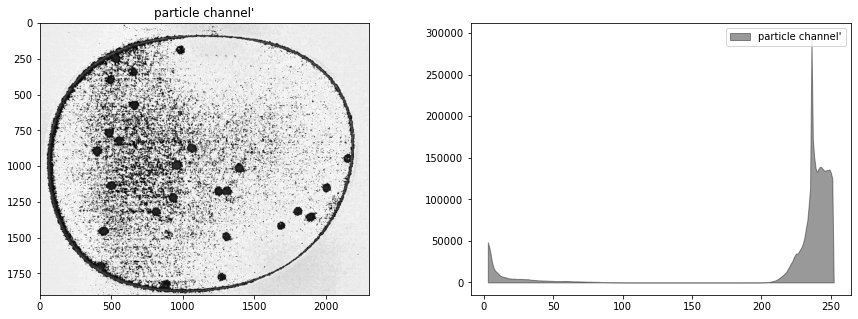

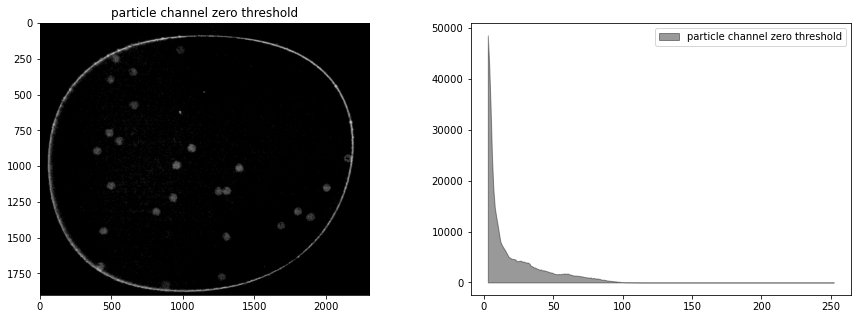

In [208]:
blue_weight = 0.58
offset = -20

# subtract blue channel from green channel
cimg = (g - blue_weight*b) + offset
display_channel(cimg, "particle channel'")

# set zero threshold and convert to integer
cimg = np.where(cimg < 0, 0, cimg)
cimg = cimg.astype(np.uint8)
display_channel(cimg, "particle channel zero threshold")

### 10.10.3.6 Histogram equalization

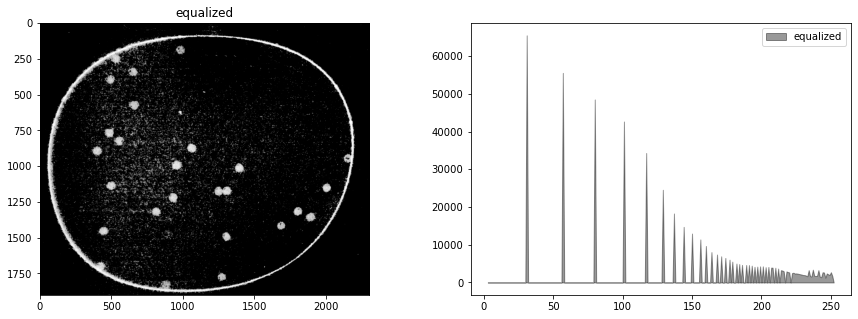

In [209]:
himg = cv2.equalizeHist(cimg)
display_channel(himg, 'equalized')

Observations

* Quantization (sometimes seen as banding) caused by limited number of levels in the channel.
* The image was underexposed at the time of capture.

### 10.10.3.7 Blur filter


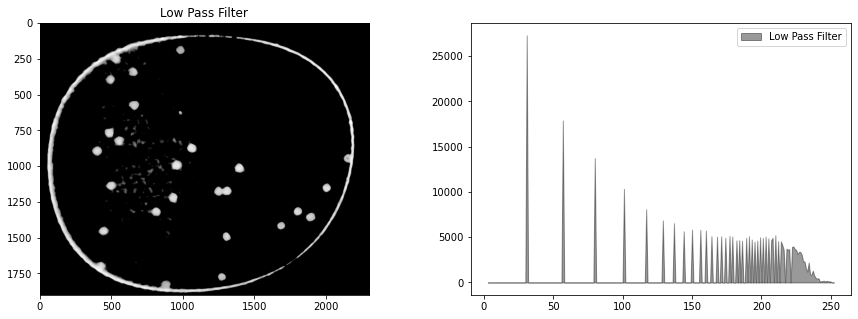

In [210]:
# kernel size (odd number)
ksize = 21

# median filter
bimg = cv2.medianBlur(himg, ksize)
display_channel(bimg, "Low Pass Filter")

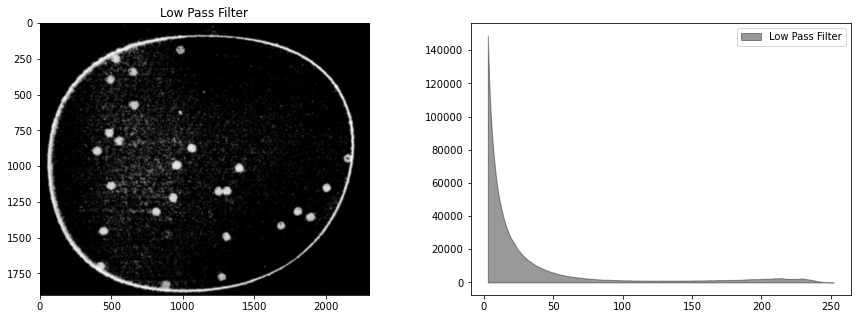

In [211]:
# Gaussian filter
bimg = cv2.GaussianBlur(himg, (ksize, ksize), 0)
display_channel(bimg, "Low Pass Filter")

### 10.10.3.8 Thresholding/Segmentation

The purpose of threshold is to isolate the features of interest from background noise. 

https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

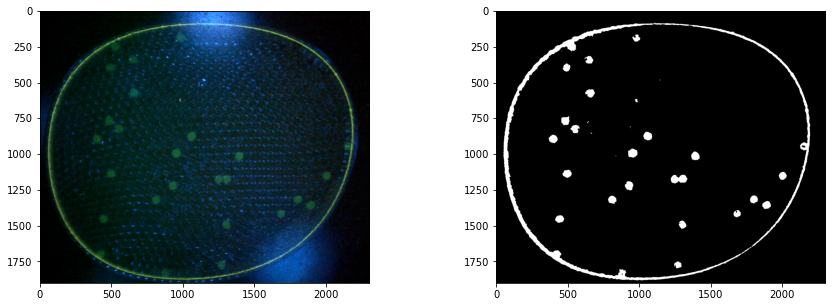

In [227]:
threshold = 130

T, simg = cv2.threshold(bimg, threshold, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(crop_img)
ax[1].imshow(simg, cmap="gray")

### 10.10.3.9 Morphological Transformation

The next goal is to remove noise and to separate particles.

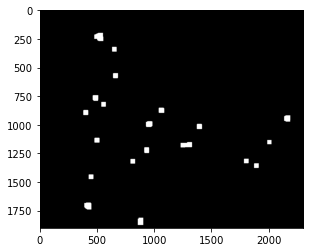

In [253]:
kernel = np.ones((3, 3))
iterations = 8

dimg = cv2.dilate(simg, kernel=kernel, iterations=iterations)
eimg = cv2.erode(dimg, kernel=kernel, iterations=iterations)

fig, ax = 
plt.imshow(eimg, cmap="gray")
iterations = 18

fimg = cv2.erode(eimg, kernel=kernel, iterations=iterations)
gimg = cv2.dilate(fimg, kernel=kernel, iterations=iterations)


plt.imshow(gimg, cmap="gray")

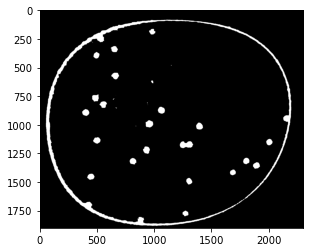

In [239]:
mimg = cv2.morphologyEx(simg, cv2.MORPH_CLOSE, kernel=kernel, iterations=7)
ming = cv2.morphologyEx(mimg, cv2.MORPH_OPEN, kernel=kernel, iterations=50)
plt.imshow(mimg, cmap="gray")

### 10.10.3.10 Finding Objects

http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/scipy-html-1.0.0/tutorial/ndimage.html

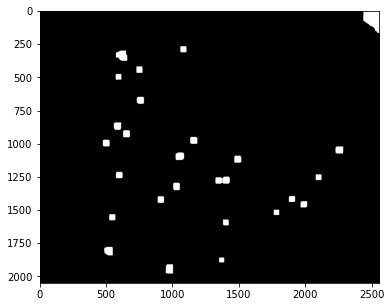

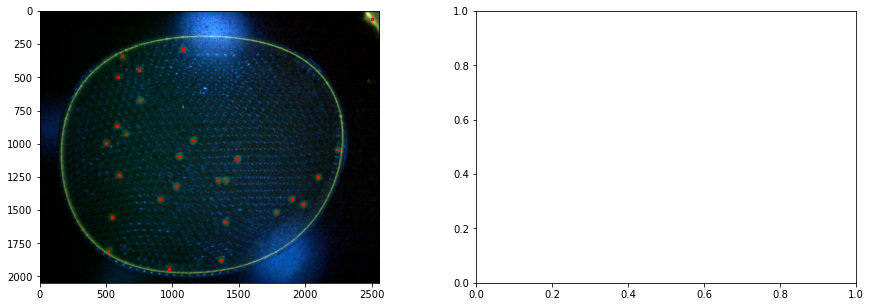

In [191]:
structure = np.ones((3, 3))

# find particles and plot objects
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
label_img, particle_count = ndimage.measurements.label(mimg, structure=structure)

# pixels are labeled with numbers corresponding to objects
ax.imshow(np.where(label_img > 0, 1, np.zeros(mimg.shape)), cmap="gray")

# centers of mass
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
pts = ndimage.center_of_mass(mimg, label_img, np.arange(1, particle_count + 1))
ax[0].imshow(img)
x = [x for (y,x) in pts]
y = [y for (y,x) in pts]
ax[0].plot(x, y, '.', ms=5, color='r')

### 10.10.3.11 Finding and Displaying Particles

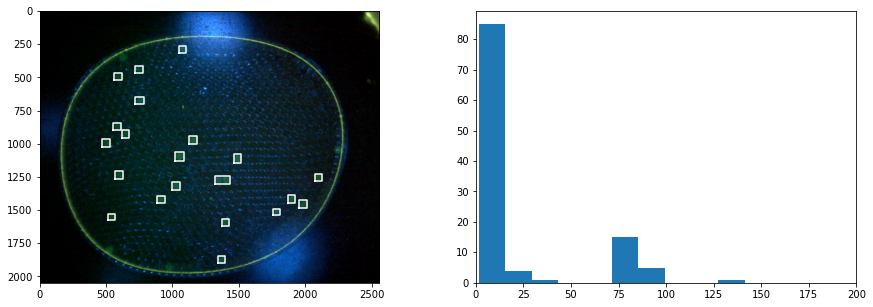

In [125]:
# find the objects and place bounding boxes

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
slices = ndimage.find_objects(label_img)
sizes = [np.sqrt((b.stop-b.start)**2 + (a.stop-a.start)**2) for a,b in slices]
ax[1].hist(sizes, bins=200)
ax[1].set_xlim(0, 200)
ax[0].imshow(img)
for k,size in enumerate(sizes):
    if size > 50 and size < 200:
        a,b = slices[k]
        ya = a.start
        yb = a.stop
        xa = b.start
        xb = b.stop
        ax[0].plot([xa, xb, xb, xa, xa], [yb, yb, ya, ya, yb], 'w')

### 10.10.3.12 What did we learn about our application?

* We need to improve the quality of the image
    * Reduce glare from the blue leds
    * Increase exposure
    
* Image processing steps
    * separate channels
    * combine channels to isolate green flourescent particles (weights?)
    * median filtering (size?)
    * histogram equalization
    * threshold (threshold value?)
    * morphological opening (kernal?, iterations?)
    * labeling (size?)
    

## 10.10.4 Particle Labeling Classes

To facilitate embedded use in a device, the next step is to consolidate these procedures into a class.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import ndimage


class Channel():
    
    def __init__(self, data):
        self.data = data
    
    @property
    def histogram(self):
        return cv.calcHist([self.img], [0], None, [256], [0, 255])
    
    def imshow(self, ax=None, title=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.imshow(self.img, cmap="gray")
        if not title is None:
            ax.set_title(title)
        
    def display_histogram(self, ax, color='k'):
        bins = np.arange(0, 256)
        ax.plot(bins, self.histogram, color=color)
        

class Particle():
    
    def __init__(self, x, y, slice):
        self.x = x
        self.y = y
        self.slice = slice
        a, b = slice
        self.xmin = b.start
        self.ymin = a.start
        self.xmax = b.stop
        self.ymax = a.stop
        
    def size(self):
        return np.sqrt((self.xmax - self.xmin) * (self.ymax - self.ymin))
        
    def bounding_box(self):
        return (self.xmin, self.xmax, self.xmax, self.xmin, self.xmin), \
               (self.ymin, self.ymin, self.ymax, self.ymax, self.ymin)


class ParticleLabeler():
    
    def __init__(self, filepath=None):
        self.filepath = filepath
        self.channels = dict()
        self.particles = list()
        if not filepath is None:
            self.imread(filepath)
            
    @property
    def particle_count(self):
        return len(self.particles)

    def imread(self, filepath):
        """Read image from given filepath."""
        self.filepath = filepath
        b, g, r = cv.split(cv.imread(filepath))
        self.channels['r'] = Channel(r)
        self.channels['g'] = Channel(g)
        self.channels['b'] = Channel(b)
        
    def imshow(self, ax=None, rgb=('r','g','b')):
        """Display image on given plot axis using specified rgb channels."""
        r, g, b = rgb
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.imshow(np.dstack((self.channels[r].img, 
                             self.channels[g].img,
                             self.channels[b].img)))
        
    def display_histogram(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        for color, channel in self.channels.items():
            channel.display_histogram(ax, color=color)
            
    def composite(self, rgb_weights={'r':1, 'g':1, 'b':1}, dst='k'):
        composite = sum([rgb_weights[c]*self.channels[c].img for c in rgb_weights.keys()])
        composite = np.where(composite < 0, 0, composite)
        self.channels[dst] = Channel(composite.astype(np.uint8))
        
    def threshold(self, src='k', dst='k', r=71):
        blurred = cv.medianBlur(self.channels[src].img, r)
        T, img =  cv.threshold(blurred, 0, 255, cv.THRESH_OTSU)
        self.channels[dst] = Channel(img)
        
    def adaptive_threshold(self, src='k', dst='k'):
        blurred = cv.medianBlur(self.channels[src].img, 5)
        img = cv.adaptiveThreshold(blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 101, 10)
        self.channels[dst] = Channel(img)
        
    def label(self, src='k'):
        img = self.channels[src].img
        labels, particle_count = ndimage.measurements.label(img, structure=np.ones((3, 3)))
        yx_pts = ndimage.center_of_mass(img, labels, np.arange(1, particle_count + 1))
        slices = ndimage.find_objects(labels)
        self.particles = [Particle(yx[1], yx[0], slice) for yx, slice in zip(yx_pts, slices)]
        
    def find_particles(self, filepath, size=(50, 150), ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(10, 12))
        self.imread(filepath)
        self.composite({'g':1, 'b':-0.53}, 'k')
        self.threshold(src='k', dst='k')
        self.label(src='k')
        self.imshow(ax)

        k = 0
        for p in labeler.particles:
            if p.size() > 50 and p.size() < 150:
                k += 1
                x, y = p.bounding_box()
                ax.plot(x, y, 'w')
                ax.plot([p.x], [p.y], 'r.', ms=5)
                ax.text(p.x + 40, p.y - 40, f"{k}", color='white')

In [122]:
help(Channel)

Help on class Channel in module __main__:

class Channel(builtins.object)
 |  Channel(img)
 |  
 |  A class to represent one channel of a multi-channel image.
 |  ...
 |  
 |  Attributes
 |  ----------
 |  img :
 |  
 |  Methods defined here:
 |  
 |  __init__(self, img)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  display_histogram(self, ax, color='k')
 |  
 |  imshow(self, ax=None, title=None)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  histogram
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



46


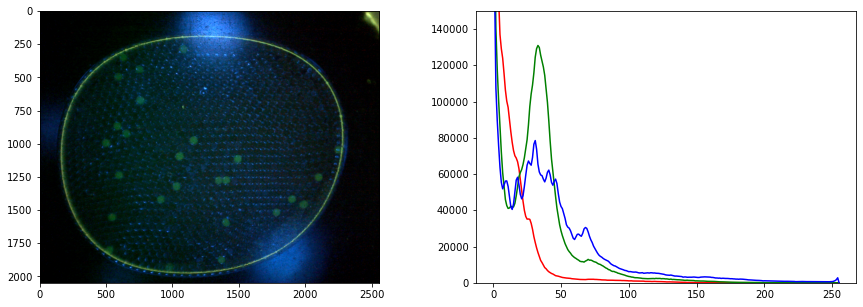

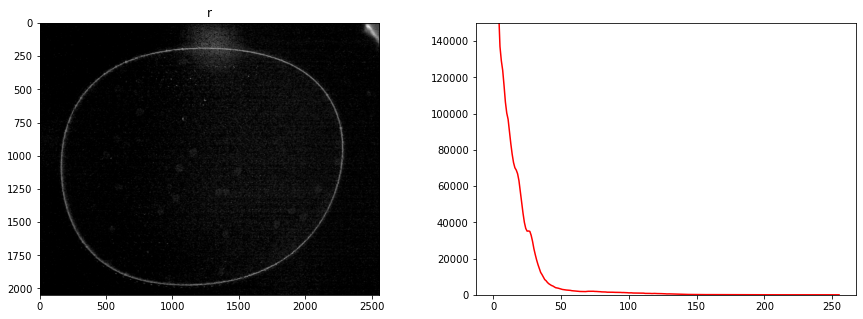

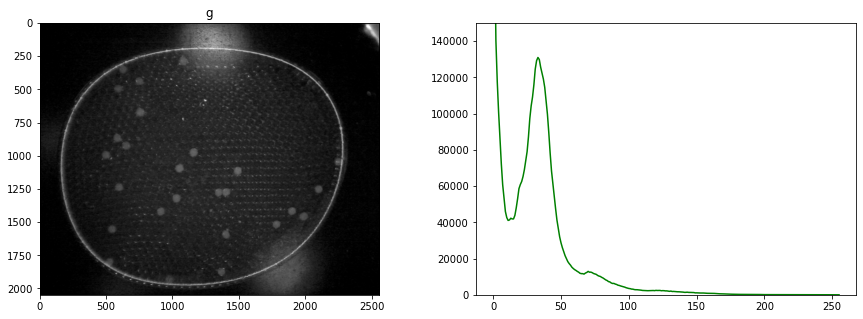

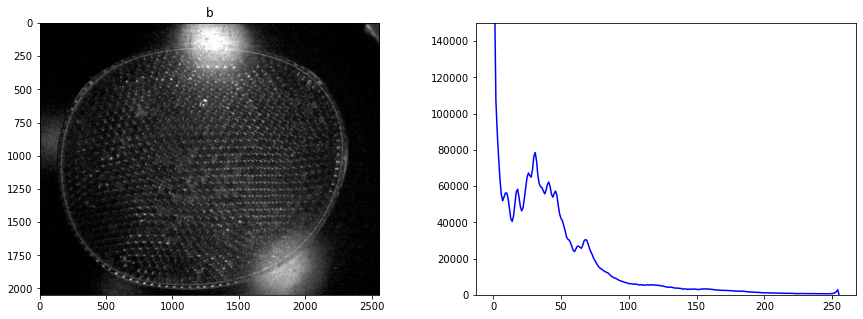

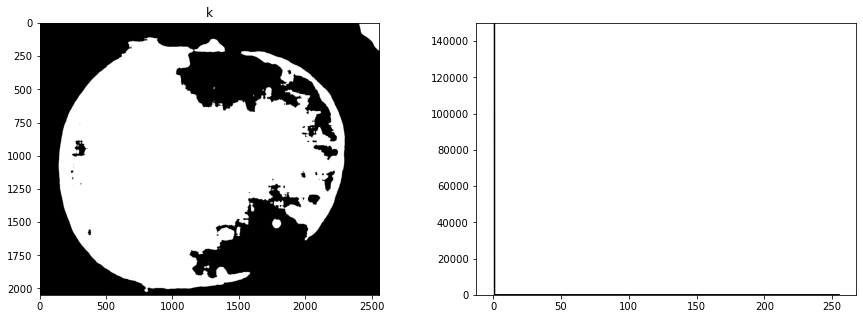

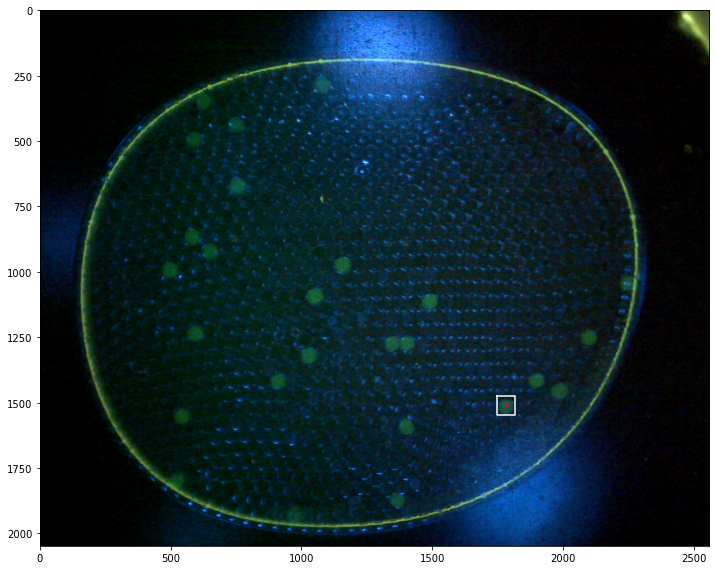

In [106]:
# TESTING

# create labeler instance
labeler = ParticleLabeler()

# read image file
labeler.imread("data/25-miniM.tif")

# display image and histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
labeler.imshow(ax[0])
labeler.display_histogram(ax[1])
ax[1].set_ylim(0, 150000)

# make composite channel
labeler.composite({'g':1, 'b':-0.53}, 'k')

# threshold
labeler.threshold(src='k', dst='k')

# label
labeler.label(src='k')
print(labeler.particle_count)

# display all channels
for color, channel in labeler.channels.items():
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    channel.imshow(ax[0], color)
    channel.display_histogram(ax[1], color=color)
    ax[1].set_ylim(0, 150000)
    
fix, ax = plt.subplots(1, 1, figsize=(12,10))
labeler.imshow(ax)
for p in labeler.particles:
    if p.size() > 50 and p.size() < 150:
        x, y = p.bounding_box()
        ax.plot(x, y, 'w')
        ax.plot([p.x], [p.y], 'r.', ms=5)

## 10.10.5 Demonstrations

46


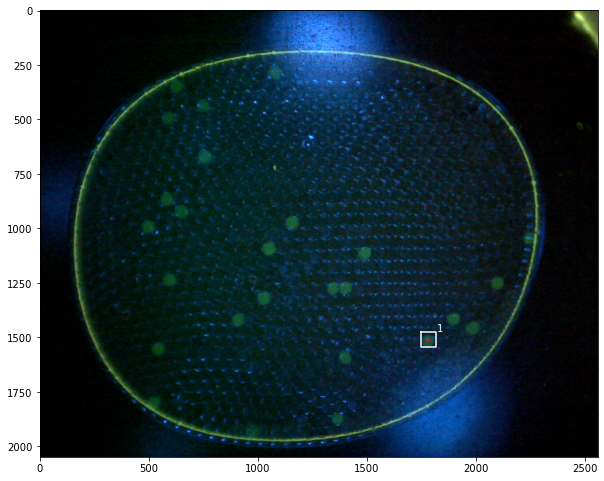

In [107]:
labeler = ParticleLabeler()
labeler.find_particles("data/25-miniM.tif", size=(50, 150))
print(labeler.particle_count)

Text(0.5, 1.0, 'Threshold = 80.0')

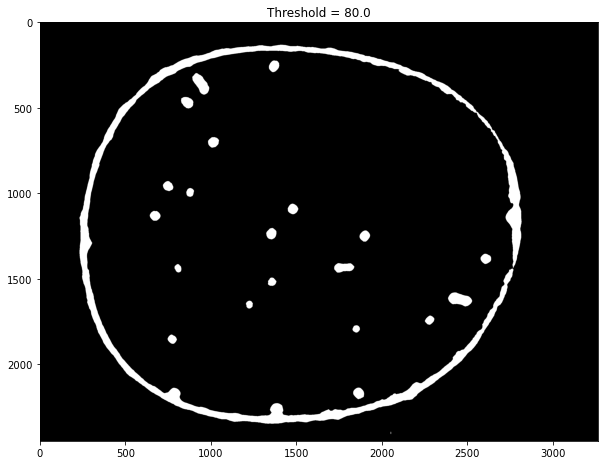

In [113]:
img = labeler.channels['g'].img
fimg = cv.GaussianBlur(img, (71, 71), 0)
fimg = cv.medianBlur(img, 51)
T, timg = cv.threshold(fimg, 80, 255, cv.THRESH_BINARY)
#T, timg = cv.threshold(fimg, 0, 255, cv.THRESH_OTSU)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))
#ax.imshow(img, cmap="gray")
#ax.imshow(img, cmap="gray")
ax.imshow(timg, cmap="gray")
ax.set_title(f"Threshold = {T}")
#ax.imshow(edges, cmap="hot", alpha=0.8)

34


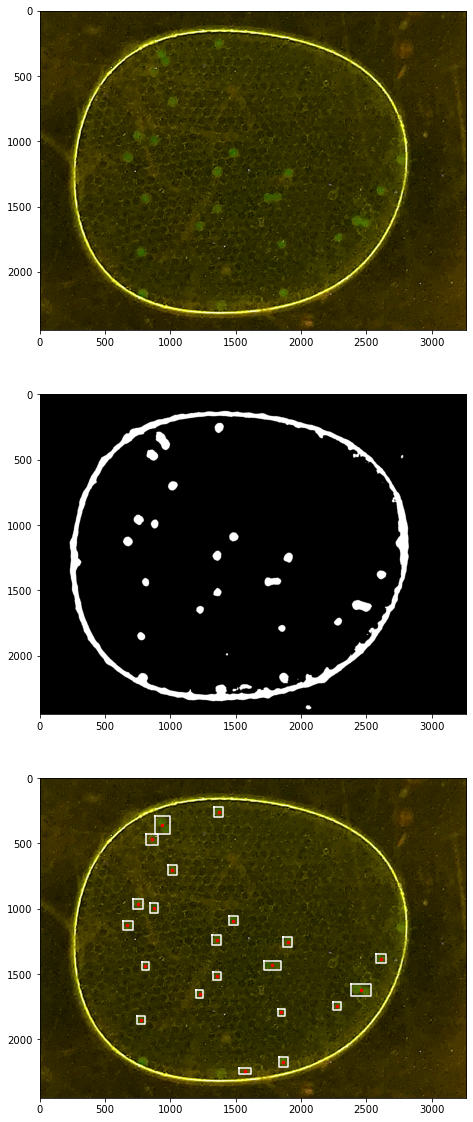

In [120]:
# TESTING

# create labeler instance
labeler = ParticleLabeler()

# read image file
labeler.imread("data/25-camera.jpg")

# make composite channel
labeler.composite({'g':1}, 'k')

# threshold
labeler.threshold(src='k', dst='k', r=41)

# label
labeler.label(src='k')
print(labeler.particle_count)

    
fix, ax = plt.subplots(3, 1, figsize=(12,20))
labeler.imshow(ax[0])
labeler.channels['k'].imshow(ax[1])
labeler.imshow(ax[2])
for p in labeler.particles:
    if p.size() > 50 and p.size() < 150:
        x, y = p.bounding_box()
        ax[2].plot(x, y, 'w')
        ax[2].plot([p.x], [p.y], 'r.', ms=5)

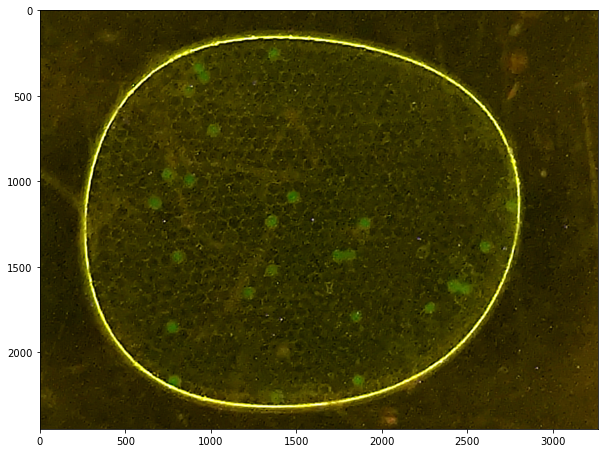

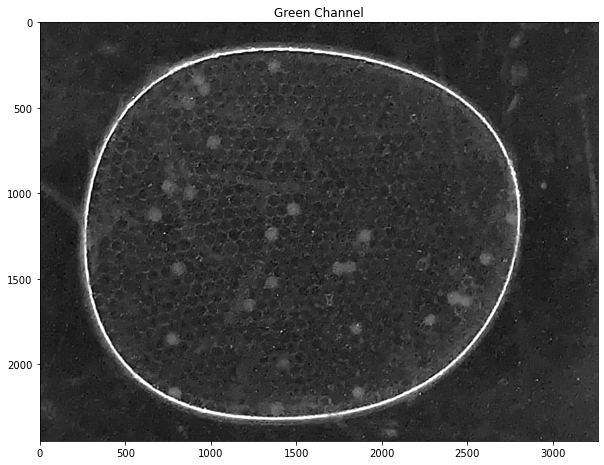

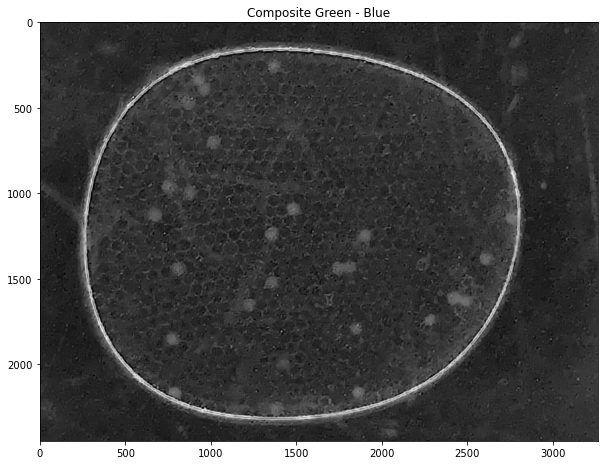

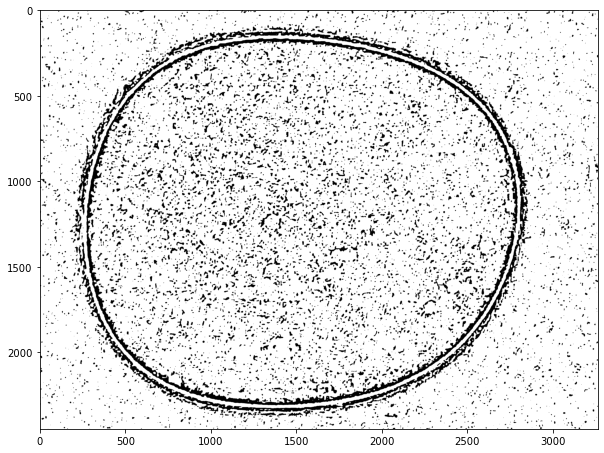

In [108]:
labeler = ParticleLabeler()
labeler.imread("data/25-camera.jpg")
labeler.imshow()
labeler.channels['g'].imshow(title="Green Channel")
labeler.composite({'g':1, 'b':-0.53}, 'k')
labeler.channels['k'].imshow(title="Composite Green - Blue")
labeler.adaptive_threshold(src='g', dst='k2')
labeler.channels['k2'].imshow()

### 10.10.5.1 Thresholding

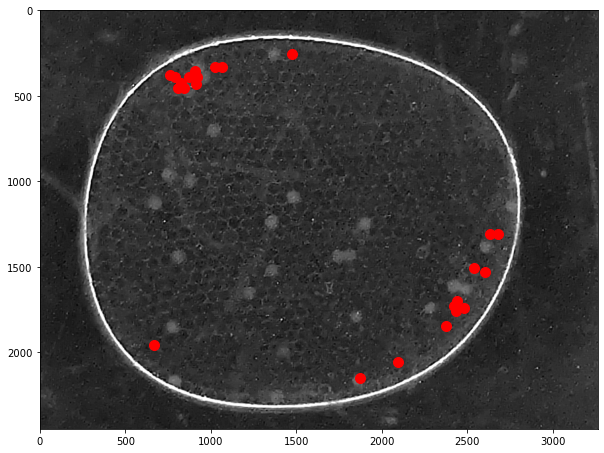

In [110]:
circles = cv.HoughCircles(timg, 
                          cv.HOUGH_GRADIENT, 
                          1.5, 
                          30, 
                          param1=80, 
                          param2=20, 
                          minRadius=50, 
                          maxRadius=200)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))
ax.imshow(img, cmap="gray")

for circle in circles[0]:
    x, y, r = circle
    plt.plot([x], [y], 'r.', ms=20)
    

<!--NAVIGATION-->
< [10.0 Projects](https://jckantor.github.io/cbe61622/10.00-Projects.html) | [Contents](toc.html) | [A.0 Python Source Library](https://jckantor.github.io/cbe61622/A.00-Appendices.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe61622/blob/master/docs/10.10-Computer-Vision.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe61622/10.10-Computer-Vision.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>